## Deep Learning: Assignment 1: Perceptrons

In [1]:
# Enter your own information here!
student_name = 'Mays AL-Azzawi'
student_id = 'AB0168'

## Assignment 1-1
### Topic: Happiness, Classifier: Perceptron (3 p)

Check out the **Somerville Happiness Survey Data Set** at
[https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey](https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey).

Preprocess the data.
Note! the file is UTF-16 encoded, so you need to set encoding when reading.

In [34]:

# Note! Implementation code of preprocessing is already written in this assignment.
import pandas as pd

df = pd.read_csv('data/SomervilleHappinessSurvey2015.csv', encoding='utf-16')

feature_columns = [
     'info-availability',
     'cost-of-housing',
     'quality-public-schools',
     'trust-in-local-police',
     'maintenance-of-streets',
     'social-event-availability'
]

columns = ['happy'] + feature_columns

df.columns = columns
# Save the DataFrame to the df variable and the training data.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['happy', 'info-availability', 'cost-of-housing',
       'quality-public-schools', 'trust-in-local-police',
       'maintenance-of-streets', 'social-event-availability'],
      dtype='object')
First row by position: happy                        0
info-availability            3
cost-of-housing              3
quality-public-schools       3
trust-in-local-police        4
maintenance-of-streets       2
social-event-availability    4
Name: 0, dtype: int64


Split the dataset into training (67 %) and testing (33 %) (`X_train`, `y_train`, `X_test`, `y_test`) dataset.
Use random seed `9001`.

In [35]:
# TODO: Type your implementation in this cell.
from sklearn.model_selection import train_test_split
# TODO: Split the dataset
y=df['happy']
X = df.drop(columns='happy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9001)

In [36]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')

Test length: 48
Train length: 95


### Implement a linear perceptron classifier

1. Use the linear perceptron from `scikit-learn` library to create a classifier. Save the classifier in the `pc` variable.

2. Predict the probability of your test data being in the class using your classifier and save the confidence scores in the variable `y_score`.
   Save the result of the predicted classes in the variable `y_pred`. Hint: you can use `decision_function()` to calculate confidence scores.

3. Save the classification report `cr` and the confusion matrix `cm` using the `metrics` module.

4. Calculate the ROC values for the regression using the `metrics` module of the `scikit-learn` library.
   Calculate the area under the ROC curve variable `auc`. Plot the threshold optimization curve using the `matplotlib` library.

5. Write in the `reflection` variable thoughts of ROC curve and accuracy.

<Figure size 640x480 with 0 Axes>

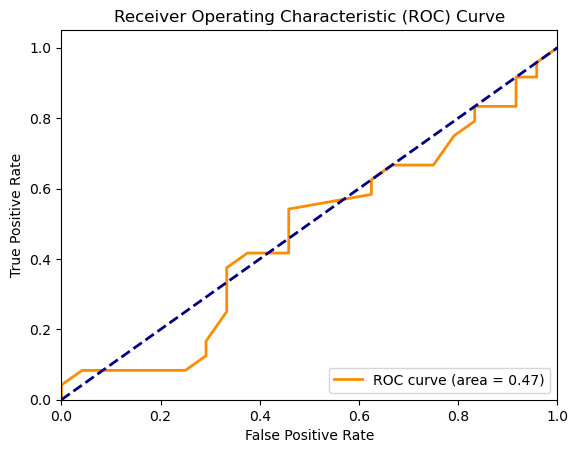

In [37]:
# TODO: Type your implementation in this cell.
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

pc = Perceptron()
pc.fit(X_train, y_train)
y_score = pc.decision_function(X_test)
y_pred = pc.predict(X_test)

# Calculate classification report and confusion matrix
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc_value = auc(fpr, tpr) 

# Plot ROC curve
plt.figure()
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_value)  # Use auc_value here
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [38]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task.
print(f'Perceptron average test accuracy: {pc.score(X_test, y_test)}')

Perceptron average test accuracy: 0.4791666666666667


In [39]:
# TODO: Type your implementation in this cell.
accuracy = pc.score(X_test, y_test)
# TODO: Reflection - thoughts of ROC curve and accuracy.

reflection = "ROC curve helps in understanding the trade-off between true positive rate and false positive rate. It's essential for evaluating classifier performance, especially when classes are imbalanced. The accuracy alone might not provide a comprehensive picture of classifier performance, especially in scenarios with class imbalances or differing costs of false positives and false negatives."



In [40]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task.

print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')
print(f'auc: {auc}')
print(f'Reflection: {reflection}')

# TODO: Visualize results also

Classification report:
               precision    recall  f1-score   support

           0       0.49      0.88      0.63        24
           1       0.40      0.08      0.14        24

    accuracy                           0.48        48
   macro avg       0.44      0.48      0.38        48
weighted avg       0.44      0.48      0.38        48

Confusion matrix:
 [[21  3]
 [22  2]]
auc: <function auc at 0x00000233E6B5CD60>
Reflection: ROC curve helps in understanding the trade-off between true positive rate and false positive rate. It's essential for evaluating classifier performance, especially when classes are imbalanced. The accuracy alone might not provide a comprehensive picture of classifier performance, especially in scenarios with class imbalances or differing costs of false positives and false negatives.


## Assignment 1-2
### Topic: Newsgroup messages with Perceptron (3 p)

Check out the following dataset:

* `sklearn.datasets.fetch_20newsgroups`

This data contains messages sent to 20 newsgroups. Data does not need to be pre-processed at all.
The following categories are used in the classification:
* `categories: ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']`
* `categories_2: ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']`

The dataset is already divided into test and train sets (`fetch_20newsgroups(subset)`).
Use the following variables with training and test sets (`X_train`, `y_train`, `X_test`, `y_test`).

Transform both training and test data with the methods of the `TfidfVectorizer` class.
* Scaling is not needed here after this
* You should print samples of the values to see if values are on the right scale: **0-1**.


In [47]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import seaborn as sns

categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']

# TODO: Set the name of the selectable test set (subset) and categories (categories)
ng_train = fetch_20newsgroups(subset='train', categories=categories,
                               remove=('headers', 'footers', 'quotes'))
ng_test = fetch_20newsgroups(subset='test', categories=categories,
                              remove=('headers', 'footers', 'quotes'))

Vectorizer = TfidfVectorizer()

# TODO: Transform the training data to numerical with the fit_transform() method
# TODO: Transform the test data using a different method
X_train = Vectorizer.fit_transform(ng_train.data)
X_test = Vectorizer.transform(ng_test.data)
y_train = ng_train.target
y_test = ng_test.target

# Create and train the Perceptron classifier
pc = Perceptron(random_state=12501)
pc.fit(X_train, y_train)

# Predict probabilities and class labels
y_score = pc.decision_function(X_test)
y_pred = pc.predict(X_test)

1. Use the linear perceptron from `scikit-learn` library to create a classifier.
   Save the classifier in the `pc` variable. Use random seed `12501`.

2. Predict the probability of your test data being in the class using your classifier and save the confidence scores in the variable `y_score`.
   Save the result of the predicted classes in the variable `y_pred`.

3. Save the classification report `cr` and the confusion matrix `cm` using the `metrics` module.

In [48]:
# TODO: Type your implementation in this cell.
# pc = Perceptron(random_state=TODO)
#
#
pc = Perceptron(random_state=12501)
pc.fit(X_train, y_train)

# Predict probabilities and class labels
y_score = pc.decision_function(X_test)
y_pred = pc.predict(X_test)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print samples of the values to verify the scale
print(f"Samples of the transformed values:\n{X_train[:3]}")

Samples of the transformed values:
  (0, 8100)	0.08900933443506315
  (0, 13560)	0.1760677365482116
  (0, 11816)	0.1874953477017967
  (0, 7336)	0.05700867308857081
  (0, 7159)	0.43379907951673946
  (0, 11576)	0.22200791333442496
  (0, 17829)	0.19903782494131828
  (0, 12675)	0.16263109619999389
  (0, 8258)	0.15786279485819896
  (0, 4136)	0.21689953975836973
  (0, 748)	0.21247446528953595
  (0, 6289)	0.13700848591536124
  (0, 16406)	0.039188154052485644
  (0, 8835)	0.050011565884066446
  (0, 2849)	0.10310121259198014
  (0, 3662)	0.35495622497306367
  (0, 11187)	0.24497800172753165
  (0, 12743)	0.12111599388261425
  (0, 2893)	0.15309764815510488
  (0, 9315)	0.1804928110170453
  (0, 2283)	0.19735227624629276
  (0, 17637)	0.20638771841817594
  (0, 15663)	0.23544455368264264
  (0, 14355)	0.23544455368264264
  (0, 16402)	0.0538571153956592
  :	:
  (2, 2031)	0.12378346315448842
  (2, 17782)	0.06099026190774639
  (2, 3919)	0.13585983971869636
  (2, 9079)	0.09185526022515683
  (2, 11856)	0.053338

In [49]:
# Running the assignment's answers.
# Note! Do not edit this cell, just run it after you complete the assignment.

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {pc.score(X_test, ng_test.target)}')
print(cm) # compare the actual values with the predictions
print(cr)

Predict: [1 2 0 ... 0 2 0] and score: [[-0.21437599  0.43421675 -0.35453969]
 [-0.3811092  -0.11365841 -0.01741706]
 [ 0.13018903 -0.89340003 -0.43527784]
 ...
 [ 0.01711722 -0.07380962 -0.23293169]
 [-0.77755308 -0.6939603   0.59417642]
 [ 0.21410956 -0.09395535 -0.1688701 ]]
Perceptron average test accuracy: 0.8582214765100671
[[365  19  12]
 [ 42 310  45]
 [ 24  27 348]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       396
           1       0.87      0.78      0.82       397
           2       0.86      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Let's draw a picture of the confusion matrix.

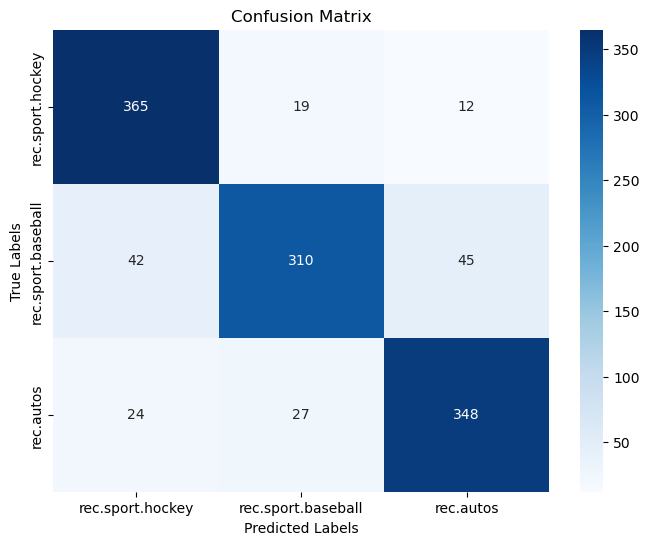

In [50]:
# TODO: plot the confusion matrixplt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Assignment 1-3) (2 p) Another newgroup classifier

Do the same task as in _assignment 1-2_ by using another `categories_2` categories list.
* The obtained results are analyzed by comparing results with the results of _assignment 1-2_.

Reflection: Compare the learning results with the newsgroup data with each other.
Verbally reflect on what the possible differences in the results are due to.

In [52]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

categories_2 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']

# TODO: Set the name of the selectable test set (subset) and categories (categories)
ng_train = fetch_20newsgroups(subset='train', categories=categories_2,
                               remove=('headers', 'footers', 'quotes'))
ng_test = fetch_20newsgroups(subset='test', categories=categories_2,
                              remove=('headers', 'footers', 'quotes'))

Vectorizer = TfidfVectorizer()

# TODO: Transform the training data with the fit_transform() method
# TODO: Transform the test data
X_train = Vectorizer.fit_transform(ng_train.data)
X_test = Vectorizer.transform(ng_test.data)
y_train = ng_train.target
y_test = ng_test.target
clf = Perceptron()
clf.fit(X_train, y_train)

# Predict labels for test data
y_pred = clf.predict(X_test)
y_score = clf.decision_function(X_test)

In [53]:
# Running the assignment's answers.
# Note! Do not edit this cell, just run it after you complete the task.

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {clf.score(X_test, ng_test.target)}')
print(confusion_matrix(ng_test.target, y_pred))
print(classification_report(ng_test.target, y_pred))

Predict: [0 2 1 ... 1 1 1] and score: [[ 0.75931831 -0.62335222 -0.67721298]
 [-0.35610155 -0.63963268  0.18019659]
 [-0.12095607  0.04081885 -0.04093458]
 ...
 [-0.10600668  0.00113055 -0.56340772]
 [-0.80357833  0.87021851 -0.86153261]
 [-0.52678505  0.08641551 -0.81847071]]
Perceptron average test accuracy: 0.7283531409168081
[[286  58  45]
 [ 54 305  35]
 [ 62  66 267]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       389
           1       0.71      0.77      0.74       394
           2       0.77      0.68      0.72       395

    accuracy                           0.73      1178
   macro avg       0.73      0.73      0.73      1178
weighted avg       0.73      0.73      0.73      1178



Let's draw a picture of the confusion matrix with `categories_2` data.

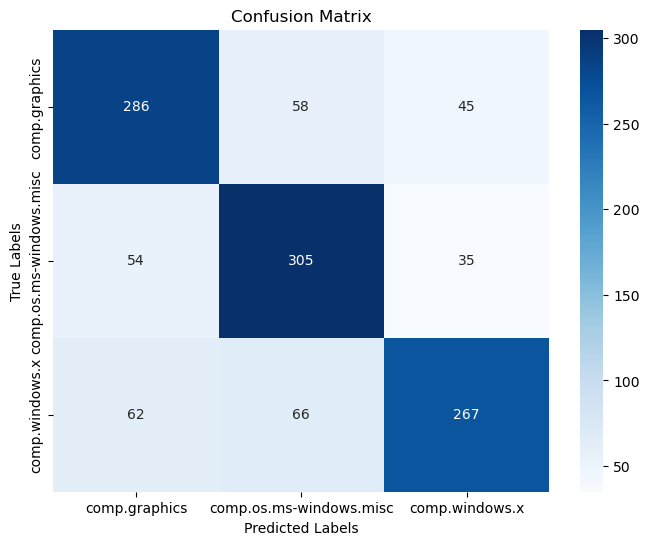

In [54]:
# TODO: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=categories_2, yticklabels=categories_2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()